# Pymaceuticals Inc.
---

### Analysis

Some observations:
 - From the `Bar Plot`, we see that Capomulin has the most observed Timepoints whereas Propriva has the least because they were  more interested in Capomulin.
 - From the `Pie Plot`, we notice that the distribution of Male vs. Female mice is almost the same, just 1% higher for males.
 - From the `Box Plot`, it seems that and Capomulin and Ramicane treatments were more effective. Also, of the 4 treatments, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], Infubinol is the only treatement with potential outlier at 36.32.
 - From the `Line Chart`, we see that towards the end of the treatment period after 30 days the Tumor is decreacing.
 - From the `Scatter Plot`, we observe that as the weight of the mice increase, the average tumor volume increase as well.
 - Finally, the number of mice that were treated with ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] were exactly the same, 25 each. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_complete.head()
# len(mouse_study_complete)  # No need for this, But I wanted to check how many rows are there!

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(mouse_study_complete["Mouse ID"].unique())
mice_count 

# print(f"The clinic is testing {mice_count} differnt mice."

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),\
                                                                                        'Mouse ID'].unique()
duplicated_mice                                                              # \ is to concatenate the 2 lines.

# Pulling the mice who were observed more than once a day - has duplicated "Timepoint".

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. ############# Note: array in other languages - list in python

duplicated_data = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicated_mice)] 
duplicated_data                                                                                

# len(duplicated_data)  # No need for this, but I wanted to know how many rows were duplicated! - and it is 13 rows!

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  #### Sometimes it is better to have a new variable -  
                                                                       # and sometimes it is better to overwrite everythng
# Is it better to have a new variable or just same variable as original - just filtering???  ##############################

cleaned_df = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicated_mice)==False]
cleaned_df.head()
# len(cleaned_df) # No need for this, but I wanted to know!
                  # Note after cleaning we have 1880 rows - before cleaning it was 1893, 13 rows were deleted
    
# Remove the mice who were observed more than once a day! Mice with duplicated "Timepoint"

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame. 
updated_mice_count = len(cleaned_df["Mouse ID"].unique())
updated_mice_count    # We know from the previous code that 1 Mouse ID was dropped so 248 mice left.

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
                     
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_regimen = cleaned_df.groupby(["Drug Regimen"])

tumor_Volume_mean = grouped_regimen["Tumor Volume (mm3)"].mean()
tumor_Volume_median = grouped_regimen["Tumor Volume (mm3)"].median()
tumor_Volume_var = grouped_regimen["Tumor Volume (mm3)"].var()
tumor_Volume_std = grouped_regimen["Tumor Volume (mm3)"].std()
tumor_Volume_sem = grouped_regimen["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_Volume_mean,
                           "Median Tumor Volume": tumor_Volume_median,
                           "Tumor Volume Variance": tumor_Volume_var,
                           "Tumor Volume Std. Dev.": tumor_Volume_std,
                           "Tumor Volume Std. Err.": tumor_Volume_sem})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# NOTE: If we put our functions in curly brackets{}, we will get the order of the columns not as wanted, but in default fashion.
adv_summary_df = cleaned_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median', "var", "std", "sem"]})
adv_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

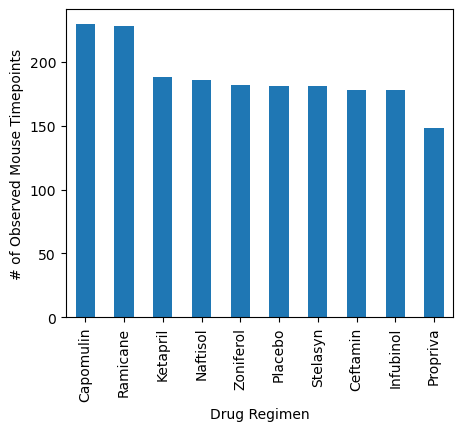

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
# NOTE: total_per_Drug_regimen is a series
total_per_Drug_regimen = grouped_regimen["Drug Regimen"].count()  

# Now I want to sort the values in "total_per_Drug_regimen" for later use and save it in a variable
total_per_Drug_regimen_sorted = total_per_Drug_regimen.sort_values(ascending = False) # sort in descending order

# Use DataFrame.plot() in order to create a bar chart of the data       
# This is a series so we could sort the values without having an ambigeous error -
# otherwise I have to rename the "Drug Regimen" Column
total_per_Drug_regimen_sorted.plot(kind="bar", figsize=(5,4))

# Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Display the Chart
plt.show()
#------------------------------------------------------------------------------------------------------------------
# Some mice with specific drug regimens has multiple timepoint observations and some has only one observed timepoint. 
# So here were are simply counting how many times each regimen has occured in our cleaned data!

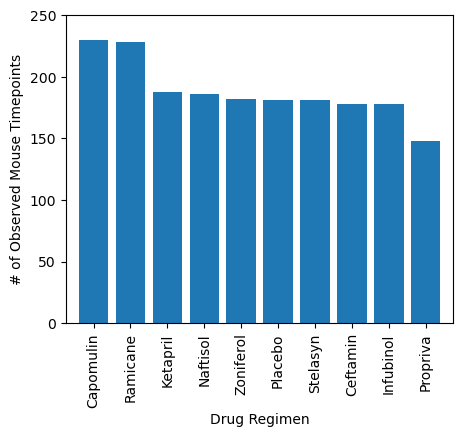

In [10]:
# THE WIDTH OF EACH BAR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# x and y as list in matplotlib - I can get the list from a series or DataFrame
drug_regimen_name = total_per_Drug_regimen_sorted.index
drug_regimen_value = total_per_Drug_regimen_sorted.values

# Resize the plot to make it fit in the screen
plt.figure(figsize=(5,4))

plt.bar(drug_regimen_name, drug_regimen_value, align="center")  # The color by default is what I prefer
tick_locations = [value for value in drug_regimen_name]         # But when I specify "blue" it is too bright

plt.xticks(tick_locations, drug_regimen_name, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(drug_regimen_name)-0.25)
plt.ylim(0, max(drug_regimen_value)+20)

# Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# plt.tight_layout()

plt.show()


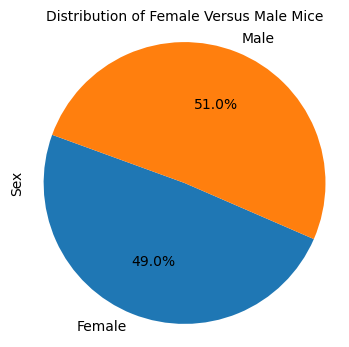

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = cleaned_df.groupby("Sex")
gender_count = gender_df["Sex"].count()

gender_pie_plot = gender_count.plot(kind="pie", y="Sex", autopct="%1.1f%%", startangle=160,  figsize=(4, 4)) 

gender_pie_plot.set_ylabel("Sex") 
gender_pie_plot.set_title("Distribution of Female Versus Male Mice").set_fontsize(10)

plt.axis("equal")
plt.show()


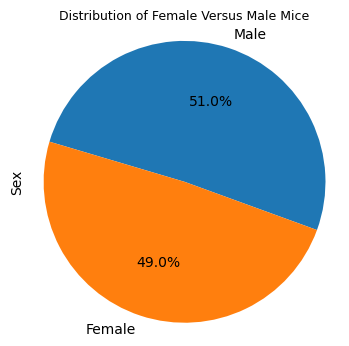

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"] 

# The values of each section of the pie chart
gender_count_ = [gender_count["Male"], gender_count["Female"]]

# The colors of each section of the pie chart
colors = ["blue", "orange"]  

# Resize the plot to make it fit in the screen
plt.figure(figsize=(4,4))

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count_, labels=labels, 
        autopct="%1.1f%%", startangle=340)  
# Labels
plt.ylabel("Sex")
plt.title("Distribution of Female Versus Male Mice").set_fontsize(9)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: -- should have 248 rows when merging 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mouse = cleaned_df.groupby("Mouse ID")             # Group it - group the mice - 248 different mice
greatest_timepoint = grouped_mouse["Timepoint"].max()      # Find the max Timepoint for each mouse - 248 rows
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)   # Create a DataFrame - 248 rows

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# NOTE: The default merge is inner join and that is what we want to get only matching rows!
tumor_vol_at_greatest_time = pd.merge(cleaned_df, greatest_timepoint_df, on=["Mouse ID", "Timepoint"])
tumor_vol_at_greatest_time.head()                          # NEW DATAFRAME WITH 248 ROWS

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # If the Drug Regimen in our last dataframe -"tumor_vol_at_greatest_time" is equal to the treatment in the list 
    # created, then get the "Tumor Volume" that corresponds to it
    final_tumor_volume = tumor_vol_at_greatest_time.loc[tumor_vol_at_greatest_time["Drug Regimen"] == treatment,\
                                                                        "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_value = final_tumor_volume       # Store the value in a variable so we use it in the equation
    tumor_vol_data.append(final_tumor_volume)  # Then store the value in the list so we use it later in plotting 

    
    # Determine outliers using upper and lower bounds
    # EQUATION:
    quartiles = tumor_vol_value.quantile([.25,.5,.75])      
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = final_tumor_volume.loc[(final_tumor_volume < lower_bound ) | (final_tumor_volume > upper_bound)]
#--------------------------------------------------------------------
# Writing and printing the results
    result = (
    f"{treatment}'s potential outliers: {outlier}"
    f"\n---------------------------------------------------------------------------------------"
    )
    print(result)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------------------------------------------
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------------------------------------------
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
---------------------------------------------------------------------------------------
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------------------------------------------


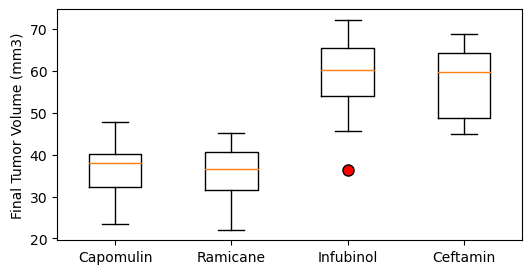

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# To Design
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
red_dot = dict(markerfacecolor = "red", markersize=10)

# Resize the plot to make it fit in the screen
plt.figure(figsize=(6,3))

# Plot our BoxPlot
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = flierprops)   

# Set the labels
plt.ylabel("Final Tumor Volume (mm3)")

# Display the BoxPlot
plt.show()

## Line and Scatter Plots

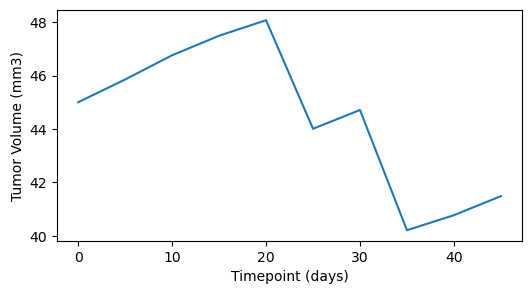

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin  ### ex - s185 -l509
                                                               # I chose to plot l509 so it matches the starter code

# See all mice who are treated with capomulin
# NOTE - We have 25 different mice who are treated with Capomulin
mouse_capomulin = tumor_vol_at_greatest_time.loc[tumor_vol_at_greatest_time["Drug Regimen"] == "Capomulin"]
mouse_capomulin["Mouse ID"]  # ----- NOTE ----                                                                                                
      # There is no need for this part, it was just for me to see which mice treated with Capomulin

# Specify which Mouse ID  we will generate a plot for in my example it will be Mouse "l509"
mouse_l509 = cleaned_df.loc[cleaned_df["Mouse ID"]=="l509"]
mouse_l509

# Resize the plot to make it fit in the screen
plt.figure(figsize=(6,3))

# Create the plot
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])

# Set the x and y axes
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


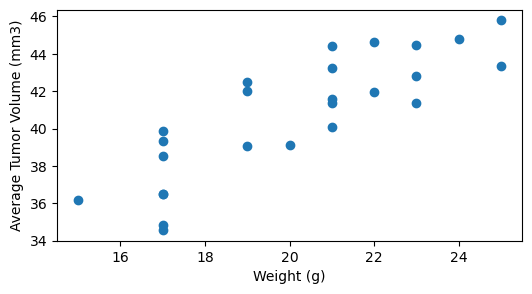

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter our data to just Mice who were treated with Capomulin 
campmulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]

# Filter again to get the avearage weight and Tumor Volume for each mice
campmulin_avg = campmulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Resize the plot to make it fit in the screen
plt.figure(figsize=(6,3))

# Choose the type of plot I want to generate - scatter plot - By default (marker="o")
plt.scatter(campmulin_avg["Weight (g)"], campmulin_avg["Tumor Volume (mm3)"])

# Create a title, x label, and y label for our chart
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


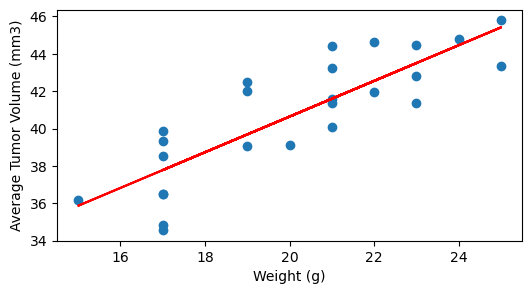

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# For correlation coeficient
correlation = st.pearsonr(campmulin_avg["Weight (g)"], campmulin_avg["Tumor Volume (mm3)"])  
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
#-------------------------------------------------------------------------------------------

# For linear reqression
model = st.linregress(campmulin_avg["Weight (g)"], campmulin_avg["Tumor Volume (mm3)"]) 
y_values = campmulin_avg['Weight (g)']*model[0]+model[1]  # model[0] is the slope and 
                                                          # model[1] is the intercept
# Resize the plot to make it fit in the screen
plt.figure(figsize=(6,3))

# Plotting
plt.scatter(campmulin_avg["Weight (g)"], campmulin_avg["Tumor Volume (mm3)"]) 
plt.plot(campmulin_avg["Weight (g)"], y_values ,color="red")

# Setting the labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()                                         